# Python initialisation : TD

Le but de ce TD est de vous familiariser avec le package pandas pour l'analyse de données et matplotlib pour la visualisation de données.

Nous allons travailler avec un fichier contenant les données d'un jour de ventes dans une chaîne américaine de restauration rapide (Chipotle).

Commençons par importer le package pandas :

In [1]:
import pandas as pd

Puis importons les données dans un DataFrame pandas :

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
path = '../data/chipotle.tsv'
df = pd.read_csv(path, sep = '\t') # les données sont séparées par un tab

## Tâche 1 : comprendre les données / nettoyage

Pour commencer, essayons de comprendre la structure des données.

In [3]:
# Afficher les 7 premières lignes du dataframe
df.head(n=7)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69


In [4]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [6]:
len(df["order_id"].unique())

1834

In [7]:
df["order_id"].nunique()

1834

In [8]:
df.shape

(4622, 5)

Les données contiennent les informations suivantes :

*   `order_id` : l'indice de la commande
*   `quantity` : le nombre de produits commandés
*   `item_name` : le nom du produit commandé
*   `choice_description` : le détail des ingrédients en option
*   `item_price` : le prix total de la commande

Une vente correspondant à un unique client est ainsi représentée par son `order_id`. Chaque item différent du menu que le client correspondant a commandé se retrouve donc sur une ligne séparée. Par exemple, si le client #11 a commandé un sandwich et une boisson, alors la vente #11 est représentée par deux lignes, une pour le sandwich et une pour la boisson, toutes deux avec `order_id=11`.


In [9]:
# Quel est le nombre de lignes dans ce jeu de données ?
df.shape[0]

4622

In [10]:
# Quel est le nombre de colonnes ?
df.shape[1]

5

In [11]:
# Combien de clients différents sont-ils venus ce jour-là ?
df['order_id'].nunique()

1834

In [12]:
# Vérifier s'il y a des données manquantes
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [13]:
# Afficher le nom de toutes les colonnes
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [14]:
# Afficher le type de toutes les colonnes
print(df.dtypes)
# Quel est le type de la 5ème colonne ?
print(df.dtypes[4])

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object
object


/tmp/ipykernel_24666/3311470189.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.dtypes[4])


La dernière colonne (le prix) est une chaîne de caractères commençant par '\$'. Transformons-la en float. Pour cela, vérifions tout d'abord que tous les éléments commencent bien par '\$'.

Indice : utiliser le package numpy et la fonction np.all() qui vérifie que tous les éléments d'une liste sont True.

In [15]:
import numpy as np

In [16]:
df['item_price'].values

array(['$2.39 ', '$3.39 ', '$3.39 ', ..., '$11.25 ', '$8.75 ', '$8.75 '],
      dtype=object)

In [17]:
np.all([True if ('$' in elt) else False for elt in df['item_price']])

True

In [18]:
df["item_price"].str.startswith("$").all()

True

In [19]:
df["item_price"].apply(lambda x: '$' in x).all()

True

In [20]:
c = "mot"
print(c)
print(c[1:])

mot
ot


In [21]:
#df["item_price"] = df["item_price"].apply(lambda x: float(x[1:]))

In [22]:
df["item_price"]

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [23]:
df["item_price"] = df["item_price"].str.replace("$", "").astype(float)

In [24]:
#df['item_price'] = df["item_price"].apply(lambda x: float(x[1:]))

## Tâche 2 : quelques analyses descriptives

Commençons par obtenir la liste de tous les éléments différents du menu vendus ce jour-là.

In [25]:
df["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [26]:
df["item_name"].value_counts()

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


Quel est le prix moyen d'une vente ? Le nombre moyen d'items par vente ? Attention, il faut commencer par regrouper les ventes par `order_id`.

In [27]:
df_groupby = df[["order_id", "quantity", "item_price"]].groupby("order_id").sum()
df_groupby.mean()

quantity       2.711014
item_price    18.811429
dtype: float64

Indiquer la vente pour laquelle le client a payé le moins et celle pour laquelle il a payé le plus.

In [28]:
commande_moins_cher = df_groupby["item_price"].idxmin()

In [29]:
df_groupby.loc[commande_moins_cher]["item_price"]

10.08

In [30]:
df[df["order_id"]==commande_moins_cher]

,order_id,quantity,item_name,choice_description,item_price
27,14,1,Carnitas Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.99
28,14,1,Canned Soda,[Dr. Pepper],1.09


In [31]:
df_groupby["item_price"].min()

10.08

In [32]:
commande_plus_cher = df_groupby["item_price"].idxmax()

In [33]:
df_groupby.loc[commande_plus_cher]["item_price"]

205.25

In [34]:
df[df["order_id"]==commande_plus_cher]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


Quel item du menu a été le plus vendu ?

Indice : La méthode DataFrame.idxmax() renvoie la ligne du DataFrame correspondant au maximum de la colonne.

In [35]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [36]:
df[["item_name","quantity","item_price"]].groupby("item_name").sum().sort_values(ascending=False, by="quantity")

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75
Chips,230,494.34
Steak Bowl,221,2260.19
Bottled Water,211,302.56
Chips and Fresh Tomato Salsa,130,361.36


In [37]:
df.groupby("item_name")["quantity"].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [38]:
df.groupby("item_name")["quantity"].sum().idxmax()

'Chicken Bowl'

Combien de cet item du menu ont été vendus ?

In [39]:
df.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

La colonne `item_price` correspond au prix total payé pour chaque item dans une vente donnée. Ce prix est donc égal au prix unitaire de l'item multiplié par la quantité que le client a achetée. Calculer le prix unitaire de chaque item dans chaque commande.

In [40]:
df["unit_price"] = df["item_price"] / df["quantity"]

En fonction des options choisies, le prix unitaire du même item peut varier d'une commande à l'autre. Quel est l'intervalle de prix pour chaque item du menu ?

In [41]:
df[["item_name", "unit_price"]].groupby("item_name")\
.apply(lambda x: (round(x["unit_price"].min(),2), round(x["unit_price"].max(),2)))

item_name
6 Pack Soft Drink                         (6.49, 6.49)
Barbacoa Bowl                            (8.69, 11.75)
Barbacoa Burrito                         (8.69, 11.75)
Barbacoa Crispy Tacos                    (8.99, 11.75)
Barbacoa Salad Bowl                      (9.39, 11.89)
Barbacoa Soft Tacos                      (8.99, 11.75)
Bottled Water                              (1.09, 1.5)
Bowl                                        (7.4, 7.4)
Burrito                                     (7.4, 7.4)
Canned Soda                               (1.09, 1.09)
Canned Soft Drink                         (1.25, 1.25)
Carnitas Bowl                            (8.99, 11.75)
Carnitas Burrito                         (8.69, 11.75)
Carnitas Crispy Tacos                    (8.99, 11.75)
Carnitas Salad                            (8.99, 8.99)
Carnitas Salad Bowl                      (9.39, 11.89)
Carnitas Soft Tacos                      (8.99, 11.75)
Chicken Bowl                             (8.19, 11.25)


In [42]:
df_minmax = df[["item_name", "unit_price"]].groupby("item_name").min()

In [43]:
df_max = df[["item_name", "unit_price"]].groupby("item_name").max()

In [44]:
df_minmax = df_minmax.merge(df_max, on="item_name")
df_minmax.rename(columns={"unit_price_x":"unit_price_min", "unit_price_y":"unit_price_max"}, inplace=True)

In [45]:
df_minmax

,unit_price_min,unit_price_max
item_name,,
6 Pack Soft Drink,6.49,6.49
Barbacoa Bowl,8.69,11.75
Barbacoa Burrito,8.69,11.75
Barbacoa Crispy Tacos,8.99,11.75
Barbacoa Salad Bowl,9.39,11.89
Barbacoa Soft Tacos,8.99,11.75
Bottled Water,1.09,1.50
Bowl,7.40,7.40
Burrito,7.40,7.40


Calculer combien d'items coûtent toujous plus que $8.

In [46]:
count_items_above_8 = (df_minmax["unit_price_min"] > 8).sum()
count_items_above_8

29

In [47]:
df_minmax["unit_price_min"][df_minmax["unit_price_min"] > 8].index.to_list()

['Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Tacos',
 'Veggie Bowl',
 'Veggie Burrito',
 'Veggie Crispy Tacos',
 'Veggie Salad',
 'Veggie Salad Bowl',
 'Veggie Soft Tacos']

Calculer le pourcentage des ventes dû à chaque item du menu.

In [48]:
df["item_price"].sum()

34500.16

In [49]:
df_percent = df[["item_name","item_price"]].groupby("item_name").sum()/df["item_price"].sum()
df_percent = df_percent.sort_values(by="item_price", ascending=False)
df_percent.head(10)

,item_price
item_name,
Chicken Bowl,0.212832
Chicken Burrito,0.161617
Steak Burrito,0.111635
Steak Bowl,0.065512
Chips and Guacamole,0.063798
Chicken Salad Bowl,0.035616
Chicken Soft Tacos,0.032118
Veggie Burrito,0.027095
Barbacoa Burrito,0.025935


À quel pourcentage des ventes correspondent les 5 items les plus vendus en nombre ? Les 5 items dont le pourcentage des ventes est le plus haut ?

In [50]:
item_plus_vendus = df[["item_name","quantity"]].groupby("item_name").sum().sort_values(ascending=False, by="quantity")

In [51]:
item_plus_vendus

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [52]:
top_5_items_list = item_plus_vendus.head(5).index.tolist()
print(top_5_items_list)

['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito', 'Canned Soft Drink']


In [53]:
df_percent.loc[top_5_items_list].sum()

item_price    0.562599
dtype: float64

In [54]:
df_percent.loc[top_5_items_list]

,item_price
item_name,
Chicken Bowl,0.212832
Chicken Burrito,0.161617
Chips and Guacamole,0.063798
Steak Burrito,0.111635
Canned Soft Drink,0.012717


In [55]:
df_percent.loc[df_percent.head(5).index.tolist()]

,item_price
item_name,
Chicken Bowl,0.212832
Chicken Burrito,0.161617
Steak Burrito,0.111635
Steak Bowl,0.065512
Chips and Guacamole,0.063798


In [56]:
df_percent.loc[df_percent.head(5).index.tolist()].sum()

item_price    0.615395
dtype: float64

<Axes: ylabel='item_name'>

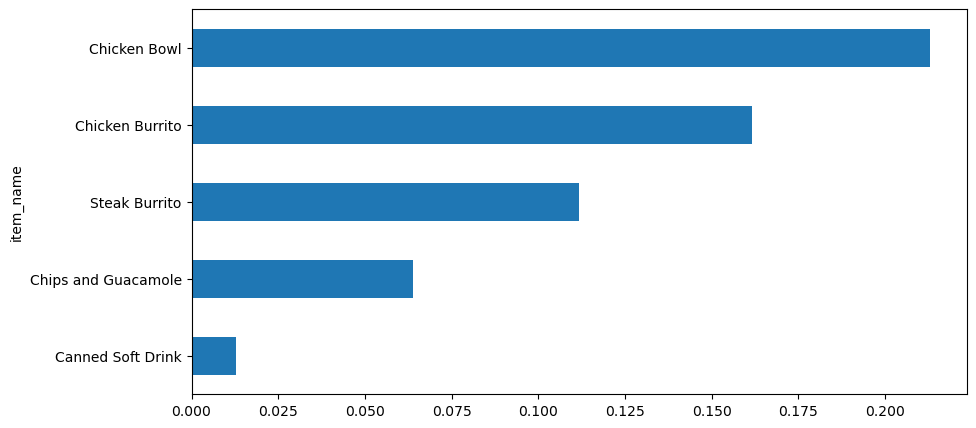

In [57]:
df_percent.loc[top_5_items_list].sort_values(by="item_price").plot(kind="barh", figsize=(10, 5), legend=False)

Un peu plus compliqué : quel est le choix le plus populaire comme accompagnement de "Chicken Bowl" ? Noter que la colonne "choice_description" est de type string.

Indices : si x est de type string, x.replace('c', 'd') remplace toutes les occurences de 'c' par 'd' dans x. x.split('e') divise x selon les occurrences de 'e' dans x en une liste de strings.


In [60]:
df["choice_description"]

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

In [ ]:
df["choice_description_list"] = df["choice_description"].str.replace("[", "")
df["choice_description_list"] = df["choice_description_list"].str.replace("]","")
df["choice_description_list"] = df["choice_description_list"].str.replace(" ","")

In [62]:
df["choice_description_list"] = df["choice_description"].str.replace(r"[\[\]\ ]", "", regex=True)

In [63]:
df["choice_description_list"]

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-RedChiliSalsa(Hot),BlackBeans,Rice,C...
                              ...                        
4617    FreshTomatoSalsa,Rice,BlackBeans,SourCream,Che...
4618    FreshTomatoSalsa,Rice,SourCream,Cheese,Lettuce...
4619    FreshTomatoSalsa,FajitaVegetables,PintoBeans,G...
4620            FreshTomatoSalsa,FajitaVegetables,Lettuce
4621    FreshTomatoSalsa,FajitaVegetables,PintoBeans,L...
Name: choice_description_list, Length: 4622, dtype: object

In [64]:
df["choice_description_list"] = df["choice_description_list"].str.split(",")

In [65]:
df["choice_description_list"]

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-RedChiliSalsa(Hot), BlackBeans, Ric...
                              ...                        
4617    [FreshTomatoSalsa, Rice, BlackBeans, SourCream...
4618    [FreshTomatoSalsa, Rice, SourCream, Cheese, Le...
4619    [FreshTomatoSalsa, FajitaVegetables, PintoBean...
4620        [FreshTomatoSalsa, FajitaVegetables, Lettuce]
4621    [FreshTomatoSalsa, FajitaVegetables, PintoBean...
Name: choice_description_list, Length: 4622, dtype: object

In [66]:
choice_description_list = df[df["item_name"]=="Chicken Bowl"]["choice_description_list"].dropna()

In [67]:
choice_description_list

4       [Tomatillo-RedChiliSalsa(Hot), BlackBeans, Ric...
5       [FreshTomatoSalsa(Mild), Rice, Cheese, SourCre...
13      [FreshTomatoSalsa, FajitaVegetables, Rice, Che...
19      [TomatilloRedChiliSalsa, FajitaVegetables, Bla...
26      [RoastedChiliCornSalsa(Medium), PintoBeans, Ri...
                              ...                        
4590    [RoastedChiliCornSalsa, Rice, BlackBeans, Chee...
4591    [TomatilloRedChiliSalsa, Rice, BlackBeans, Sou...
4595         [TomatilloGreenChiliSalsa, Rice, BlackBeans]
4599             [RoastedChiliCornSalsa, Cheese, Lettuce]
4604    [FreshTomatoSalsa, Rice, BlackBeans, Cheese, S...
Name: choice_description_list, Length: 726, dtype: object

In [68]:
big_list = []
for index, row in choice_description_list.items():
    big_list += row

In [71]:
big_list = choice_description_list.explode().tolist()
big_list

['Tomatillo-RedChiliSalsa(Hot)',
 'BlackBeans',
 'Rice',
 'Cheese',
 'SourCream',
 'FreshTomatoSalsa(Mild)',
 'Rice',
 'Cheese',
 'SourCream',
 'Guacamole',
 'Lettuce',
 'FreshTomatoSalsa',
 'FajitaVegetables',
 'Rice',
 'Cheese',
 'SourCream',
 'Guacamole',
 'TomatilloRedChiliSalsa',
 'FajitaVegetables',
 'BlackBeans',
 'SourCream',
 'Cheese',
 'Lettuce',
 'RoastedChiliCornSalsa(Medium)',
 'PintoBeans',
 'Rice',
 'FajitaVeggies',
 'Cheese',
 'SourCream',
 'Lettuce',
 'RoastedChiliCornSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Guacamole',
 'Lettuce',
 'FreshTomatoSalsa',
 'Rice',
 'BlackBeans',
 'PintoBeans',
 'Cheese',
 'Lettuce',
 'FreshTomatoSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Lettuce',
 'TomatilloRedChiliSalsa',
 'Rice',
 'FajitaVegetables',
 'SourCream',
 'Lettuce',
 'TomatilloRedChiliSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Lettuce',
 'FreshTomatoSalsa',
 'Guacamole',
 'Cheese',
 'SourCream',
 'FajitaVegetables',
 'Rice',
 

In [ ]:
# big_list = sum(choice_description_list.tolist(), [])
# big_list

['Tomatillo-RedChiliSalsa(Hot)',
 'BlackBeans',
 'Rice',
 'Cheese',
 'SourCream',
 'FreshTomatoSalsa(Mild)',
 'Rice',
 'Cheese',
 'SourCream',
 'Guacamole',
 'Lettuce',
 'FreshTomatoSalsa',
 'FajitaVegetables',
 'Rice',
 'Cheese',
 'SourCream',
 'Guacamole',
 'TomatilloRedChiliSalsa',
 'FajitaVegetables',
 'BlackBeans',
 'SourCream',
 'Cheese',
 'Lettuce',
 'RoastedChiliCornSalsa(Medium)',
 'PintoBeans',
 'Rice',
 'FajitaVeggies',
 'Cheese',
 'SourCream',
 'Lettuce',
 'RoastedChiliCornSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Guacamole',
 'Lettuce',
 'FreshTomatoSalsa',
 'Rice',
 'BlackBeans',
 'PintoBeans',
 'Cheese',
 'Lettuce',
 'FreshTomatoSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Lettuce',
 'TomatilloRedChiliSalsa',
 'Rice',
 'FajitaVegetables',
 'SourCream',
 'Lettuce',
 'TomatilloRedChiliSalsa',
 'Rice',
 'BlackBeans',
 'Cheese',
 'SourCream',
 'Lettuce',
 'FreshTomatoSalsa',
 'Guacamole',
 'Cheese',
 'SourCream',
 'FajitaVegetables',
 'Rice',
 

In [78]:
df[df["item_name"]=="Chicken Bowl"]["quantity"].value_counts()

quantity
1    693
2     31
3      2
Name: count, dtype: int64

In [79]:
from collections import Counter

# Count occurrences of items in big_list
item_counts = Counter(big_list)

# Sort items by occurrences in descending order
sorted_items = item_counts.most_common()

# Display the sorted items
sorted_items

[('Rice', 684),
 ('Cheese', 549),
 ('Lettuce', 443),
 ('SourCream', 427),
 ('BlackBeans', 386),
 ('FreshTomatoSalsa', 324),
 ('Guacamole', 282),
 ('FajitaVegetables', 209),
 ('PintoBeans', 120),
 ('RoastedChiliCornSalsa', 106),
 ('FajitaVeggies', 87),
 ('FreshTomatoSalsa(Mild)', 83),
 ('Tomatillo-RedChiliSalsa(Hot)', 65),
 ('RoastedChiliCornSalsa(Medium)', 65),
 ('TomatilloGreenChiliSalsa', 65),
 ('TomatilloRedChiliSalsa', 61),
 ('Tomatillo-GreenChiliSalsa(Medium)', 21),
 ('FreshTomato(Mild)', 4),
 ('WhiteRice', 2)]

In [81]:
# Count occurrences of each item in big_list
item_counts = {}
for item in big_list:
    if item in item_counts:
        item_counts[item] += 1
    else:
        item_counts[item] = 1

# Sort items by their counts in descending order
sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted items
sorted_items

[('Rice', 684),
 ('Cheese', 549),
 ('Lettuce', 443),
 ('SourCream', 427),
 ('BlackBeans', 386),
 ('FreshTomatoSalsa', 324),
 ('Guacamole', 282),
 ('FajitaVegetables', 209),
 ('PintoBeans', 120),
 ('RoastedChiliCornSalsa', 106),
 ('FajitaVeggies', 87),
 ('FreshTomatoSalsa(Mild)', 83),
 ('Tomatillo-RedChiliSalsa(Hot)', 65),
 ('RoastedChiliCornSalsa(Medium)', 65),
 ('TomatilloGreenChiliSalsa', 65),
 ('TomatilloRedChiliSalsa', 61),
 ('Tomatillo-GreenChiliSalsa(Medium)', 21),
 ('FreshTomato(Mild)', 4),
 ('WhiteRice', 2)]

Comptons à présent le nombre de fois que chaque accompagnement de "Chicken Bowl" a été choisi.

Pour terminer, calculons le nombre moyen d'accompagnements par burrito.

In [82]:
df["n_accompagnements"] = df["choice_description_list"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [ ]:
df[df["item_name"].str.contains("Burrito")]["n_accompagnements"].mean()

5.395051194539249

In [86]:
df_burrito = df[df["item_name"].str.contains("Burrito")]

In [91]:
(df_burrito["n_accompagnements"]*df_burrito["quantity"]).sum()/df_burrito["quantity"].sum()

5.374492282696995

In [85]:
df[df["item_name"].str.contains("Burrito")]["item_name"].unique()

array(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito',
       'Carnitas Burrito', 'Veggie Burrito', 'Burrito'], dtype=object)

## Save the dataframe

In [94]:
df.to_csv("../data/chipotle_cleaned.csv", index=False)

In [47]:
df.to_csv("csv_local.csv",index=False, sep=";")

In [48]:
df.to_excel("../data/chipotle_cleaned.xlsx", index=False)

## Tâche 3 : visualisation des données

Testons maintenant ce qu'on a appris sur matplotlib pour effectuer quelques visualisations simples du jeu de données.

Commençons par afficher la distribution des valeurs de ventes. Jouer par exemple sur le paramètre `bins` (si entier = nombre de barres d'histogrammes, si liste = intervalles des barres).

In [95]:
import matplotlib.pyplot as plt

In [96]:
df_price = df.groupby("order_id")["item_price"].sum()

<Axes: >

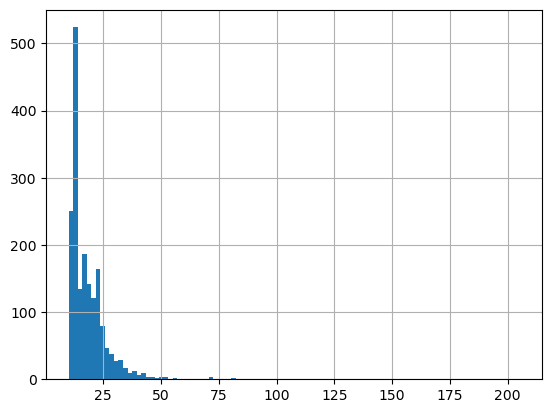

In [100]:
df_price.hist(bins=100)

<Axes: >

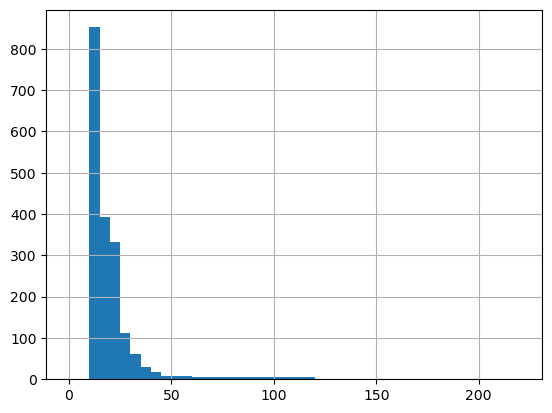

In [102]:
df_price.hist(bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 80, 100, 120, 140, 160, 180, 200, 220])

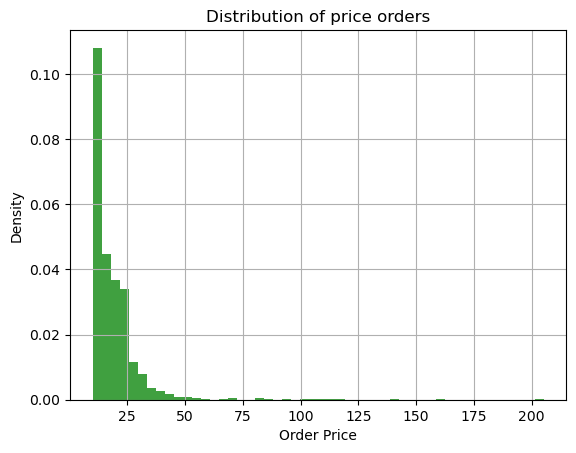

In [89]:
plt.hist(df_price, bins=50, facecolor='g', alpha=0.75, density=True)
plt.xlabel('Order Price')
plt.ylabel('Density')
plt.title('Distribution of price orders')
#plt.axis([0, 50, 0, 0.22])
plt.grid(True)
plt.show()

Il est difficile de bien visualiser la distribution des données. Passons donc en axes logarithmiques. En matplotlib, cela se fait simplement avec la commande `plt.yscale('log')` (de même pour `xscale`), ou bien `ax.set_yscale('log')` si on travaille avec un axe.

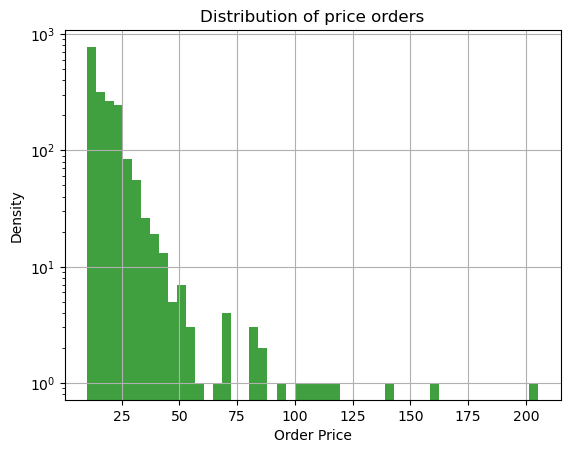

In [108]:
plt.hist(df_price, bins=50, facecolor='g', alpha=0.75, density=False)
plt.xlabel('Order Price')
plt.ylabel('Density')
plt.yscale('log')
plt.title('Distribution of price orders')
#plt.axis([0, 50, 0, 0.22])
plt.grid(True)
plt.show()

Affichons maintenant deux histogrammes côte à côte : celui des valeurs de ventes que nous venons de calculer, et celui des prix moyens de chaque item du menu.

/tmp/ipykernel_24666/3967287743.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


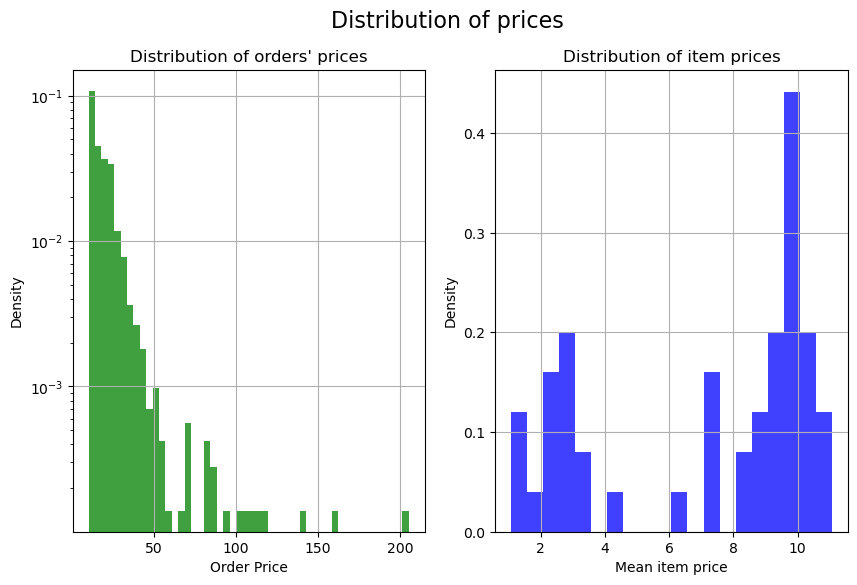

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
#ax 0
axes[0].hist(df_price, bins=50, facecolor='g', alpha=0.75, density=True)
axes[0].set_xlabel('Order Price')
axes[0].set_ylabel('Density')
axes[0].set_yscale('log')
axes[0].set_title("Distribution of orders' prices")
axes[0].grid(True)

#ax 1
axes[1].hist(df.groupby("item_name")["unit_price"].mean(),
             bins=20, facecolor='b', alpha=0.75, density=True)
axes[1].set_xlabel('Mean item price')
axes[1].set_ylabel('Density')
#axes[0].set_yscale('log')
axes[1].set_title('Distribution of item prices')
axes[1].grid(True)
fig.suptitle('Distribution of prices', fontsize=16)
fig.show()

Affichons à présent le nombre de ventes par "item_name" pour les 10 items les plus vendus. Indice : utiliser la fonction `plt.bar()` pour afficher un barplot, qui prend en arguments `x` (les abscisses des rectangles) et `height` (leur hauteur).

In [114]:
df_barplot = df.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(10)

In [115]:
df_barplot

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

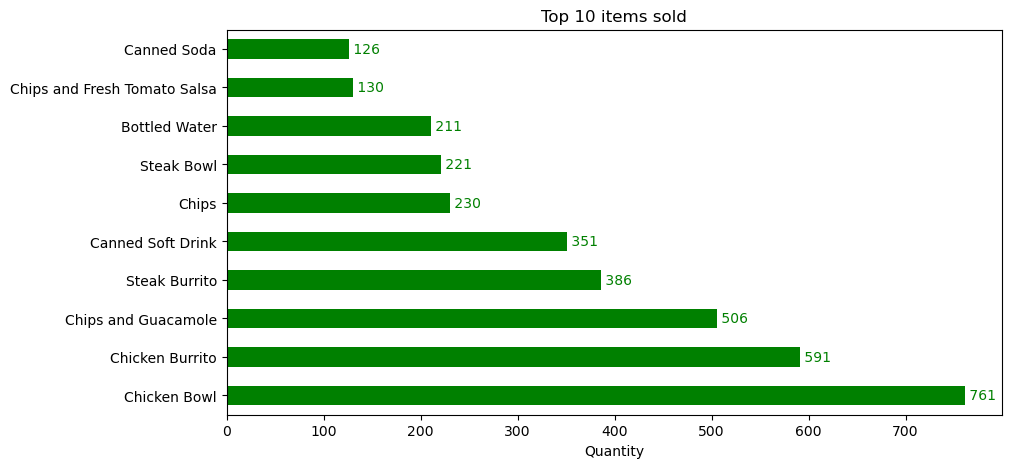

In [118]:
ax = df_barplot.plot(kind="barh", xlabel="Quantity", ylabel="",title="Top 10 items sold", figsize=(10, 5), legend=False, color="g")

# Add values to each bar
for index, value in enumerate(df_barplot):
    ax.text(value, index, " "+str(value), va='center', color='g', fontsize = 10)

In [117]:
name_list = df_barplot.index.tolist()
quantity_list = df_barplot.values.tolist()

Affichons maintenant les noms des items sur l'axe des abscisses. Nous allons utiliser la fonction `plt.xticks(ticks=..., labels=..., rotation=...)` où `ticks` correspond aux abscisses de nos points de données, `labels` à la liste des labels désirés et `rotation` l'angle de rotation.

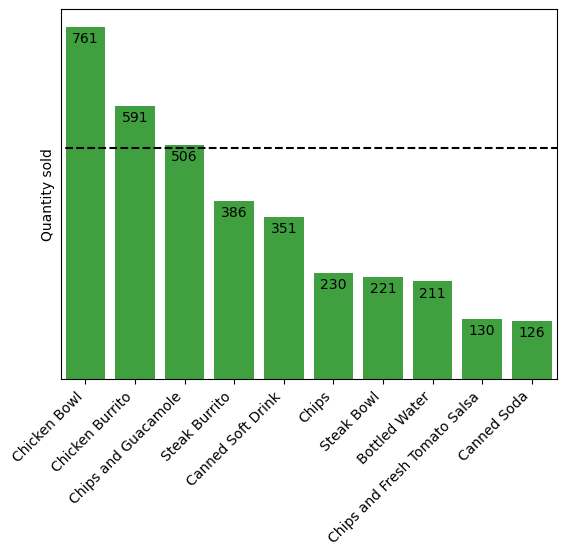

In [97]:
plt.bar(name_list, quantity_list, facecolor='g', alpha=0.75)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(quantity_list):
    plt.text(i, v-40,  str(v), ha='center', va='bottom', color='k')
plt.ylabel('Quantity sold')
#turn off ylabels
plt.yticks([])
plt.xlim(-0.5, 9.5)
plt.hlines(y=500, xmin=-2, xmax = 12, linestyle="--", color="k")

Pour terminer, introduisons le package `seaborn` qui permet d'obtenir des visualisations plus avancées. Affichons la distribution de prix unitaires pour chaque item parmi les 10 items les plus vendus. On sait que selon l'item, le prix peut varier en fonction des options.

In [98]:
import seaborn as sns

In [99]:
df_unit_price = df.groupby("item_name")["unit_price"].mean().sort_values(ascending=False).head(10)

<Axes: ylabel='item_name'>

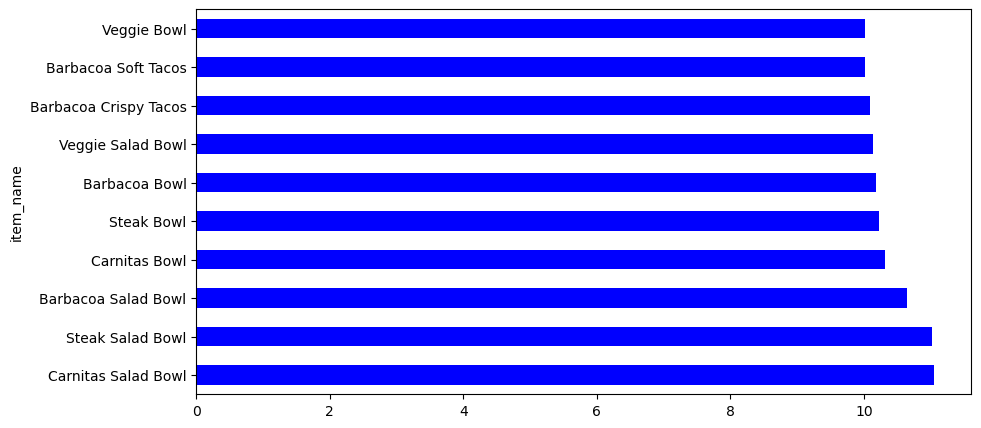

In [100]:
df_unit_price.plot(kind='barh', figsize=(10, 5), legend=False, color="b")

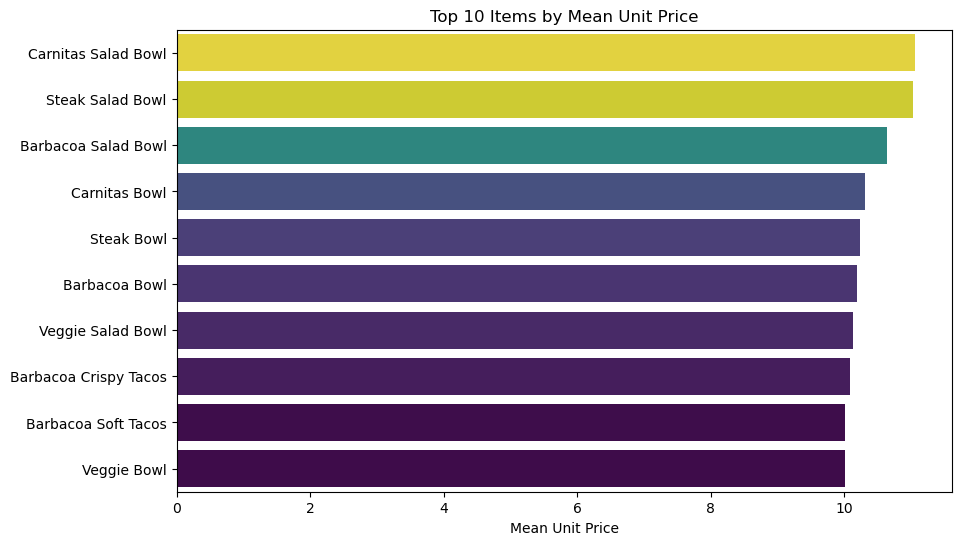

In [102]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x=df_unit_price.values, y=df_unit_price.index, palette="viridis", hue=pow(df_unit_price.values,8), legend=False)
plt.xlabel("Mean Unit Price")
plt.ylabel("")
#plt.xticks([])
plt.title("Top 10 Items by Mean Unit Price")

plt.show()

In [103]:
pow(df_unit_price.values,8)

array([2.23354000e+08, 2.18752151e+08, 1.64260456e+08, 1.28218882e+08,
       1.20191607e+08, 1.16001462e+08, 1.11666501e+08, 1.07198844e+08,
       1.01481515e+08, 1.00954551e+08])

/tmp/ipykernel_16621/3463209291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_list, y=quantity_list, palette="viridis")


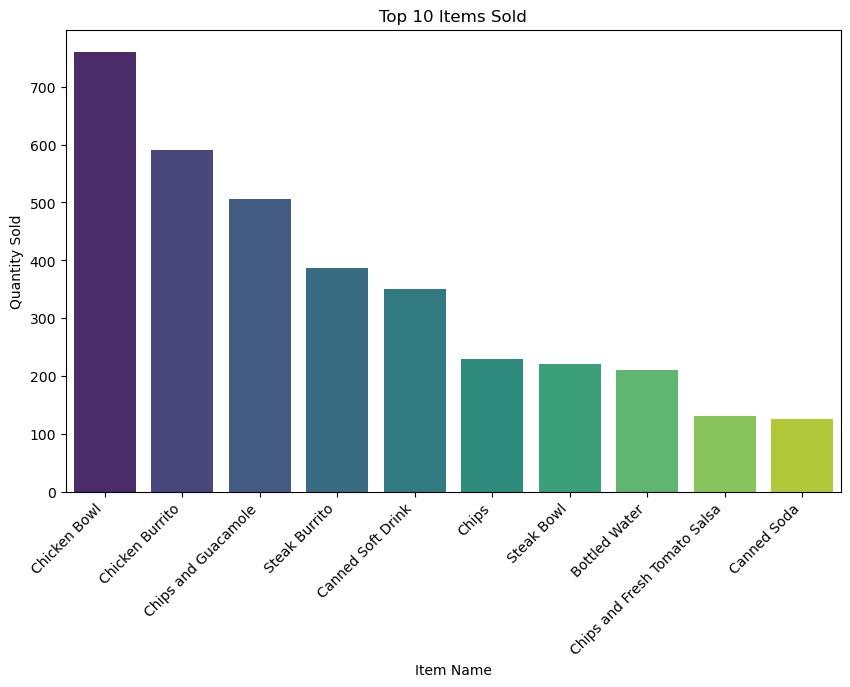

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x=name_list, y=quantity_list, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Item Name")
plt.ylabel("Quantity Sold")
plt.title("Top 10 Items Sold")
plt.show()

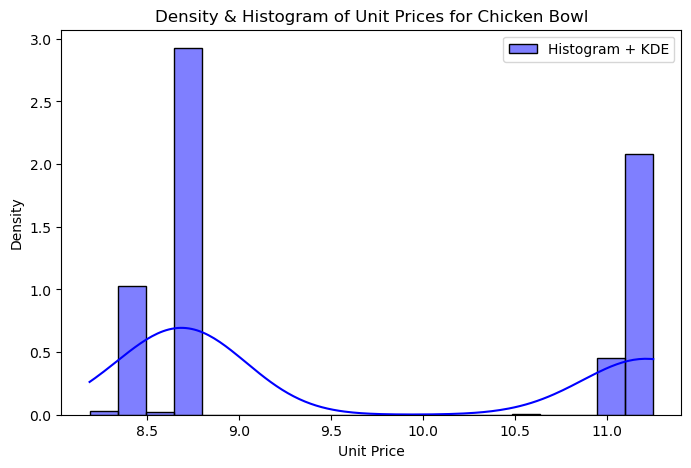

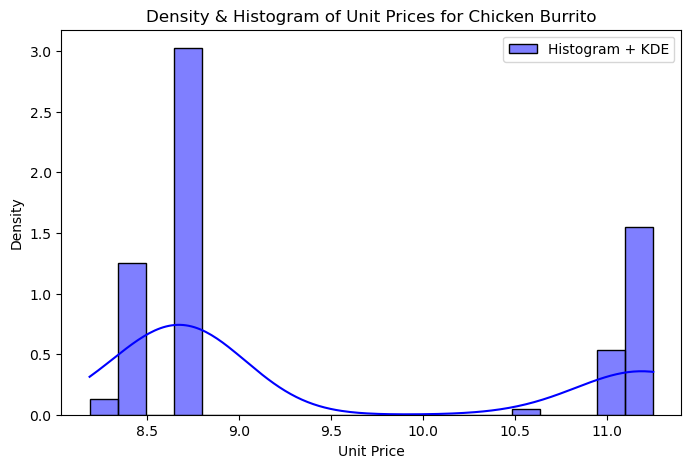

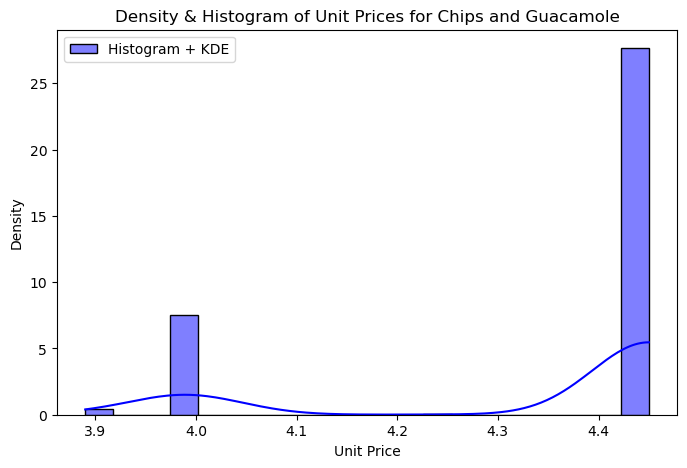

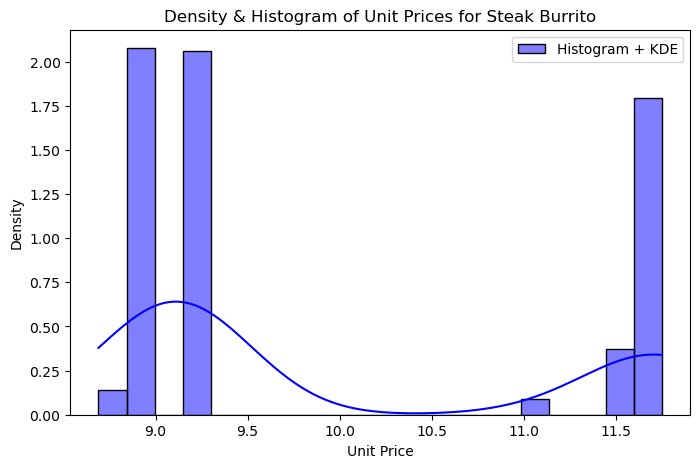

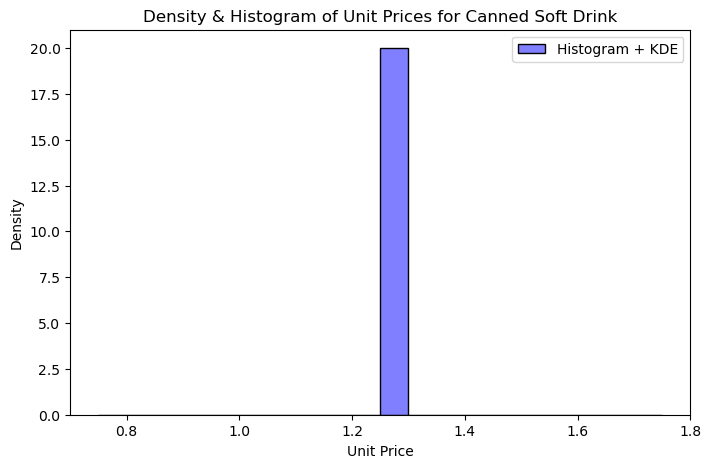

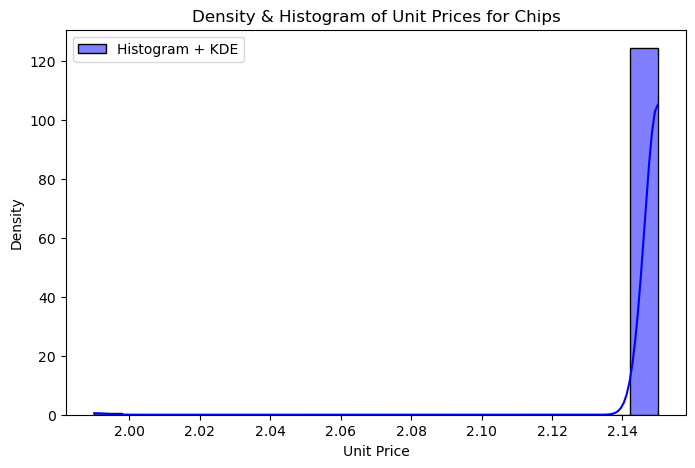

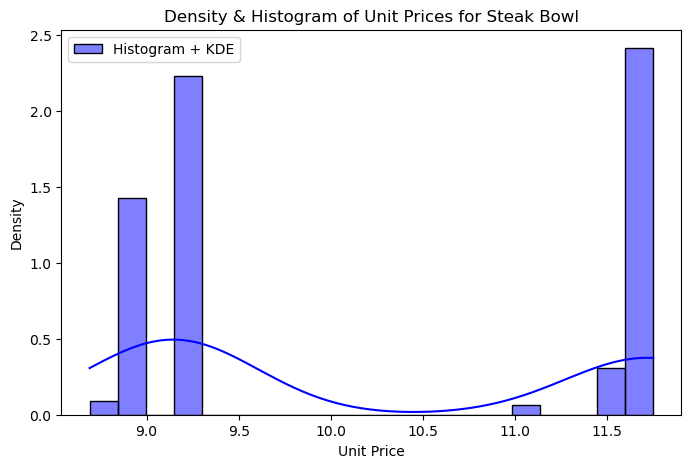

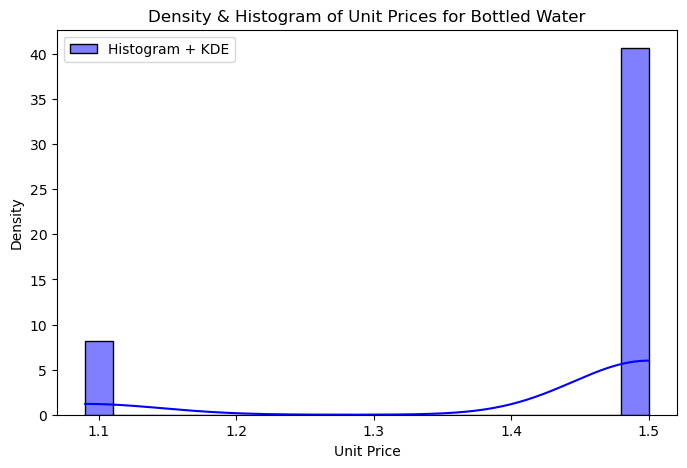

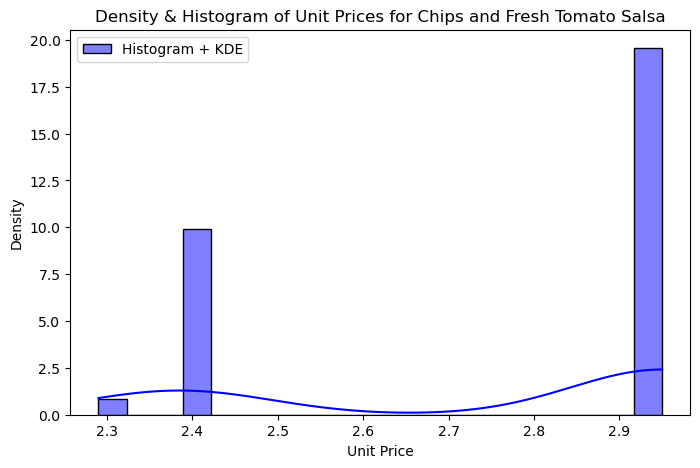

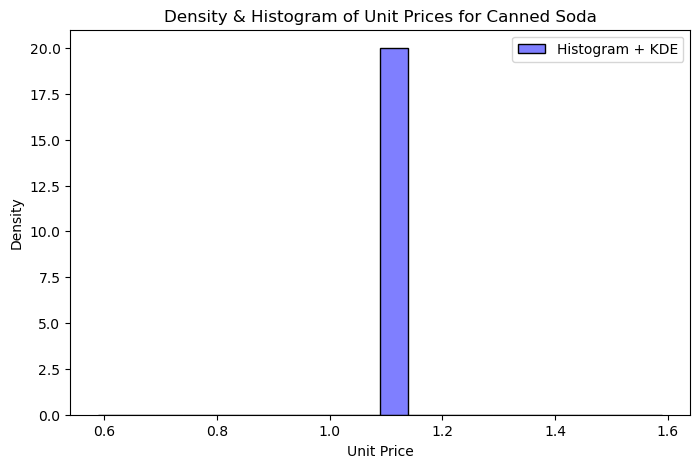

In [110]:
for item in name_list:
    plt.figure(figsize=(8, 5))
    data = df[df["item_name"] == item]["unit_price"]
    sns.histplot(data, bins=20, kde=True, stat="density", color="blue", label="Histogram + KDE")
    plt.xlabel("Unit Price")
    plt.ylabel("Density")
    plt.title(f"Density & Histogram of Unit Prices for {item}")
    plt.legend()
    plt.show()

In [114]:
print(df[df["item_name"]=="Chips"]["unit_price"].value_counts())

2.15    210
1.99      1
Name: unit_price, dtype: int64
